In [111]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

RANDOM_STATE = 42

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)

file_name = os.path.join(cwd, '..', 'data', 'raw', 'casas_dev.csv')
# Load the dataset
df = pd.read_csv(file_name)

import sys
sys.path.append(os.path.join(cwd, '..', 'src'))
from utils import convert_sqft_to_m2, plot_pairplot
from data_splitting import train_validate_split
from models import LinearRegression
from metrics import Metrics, MSE, MAE, R2
from preprocessing import one_hot_encoding, handle_missing_values, normalize_df

Current working directory: c:\Users\iluno\OneDrive\Documents\GitHub\ML\TP1\Nomberg_Ilan_TP1\notebooks


1.1

In [113]:
## Fill missing values

handle_missing_values(df, "age")
handle_missing_values(df, "rooms")

#make one hot encoding area units (m2, sqft)
df = one_hot_encoding(df, "area_units")

# convert sqft to m2
convert_sqft_to_m2(df, "area_units_sqft", "area")

# Save the modified dataset in the processed folder
processed_file_name = os.path.join(cwd, '..', 'data', 'processed', 'casas_dev_fixed.csv')
df.to_csv(processed_file_name, index=False)

1.2

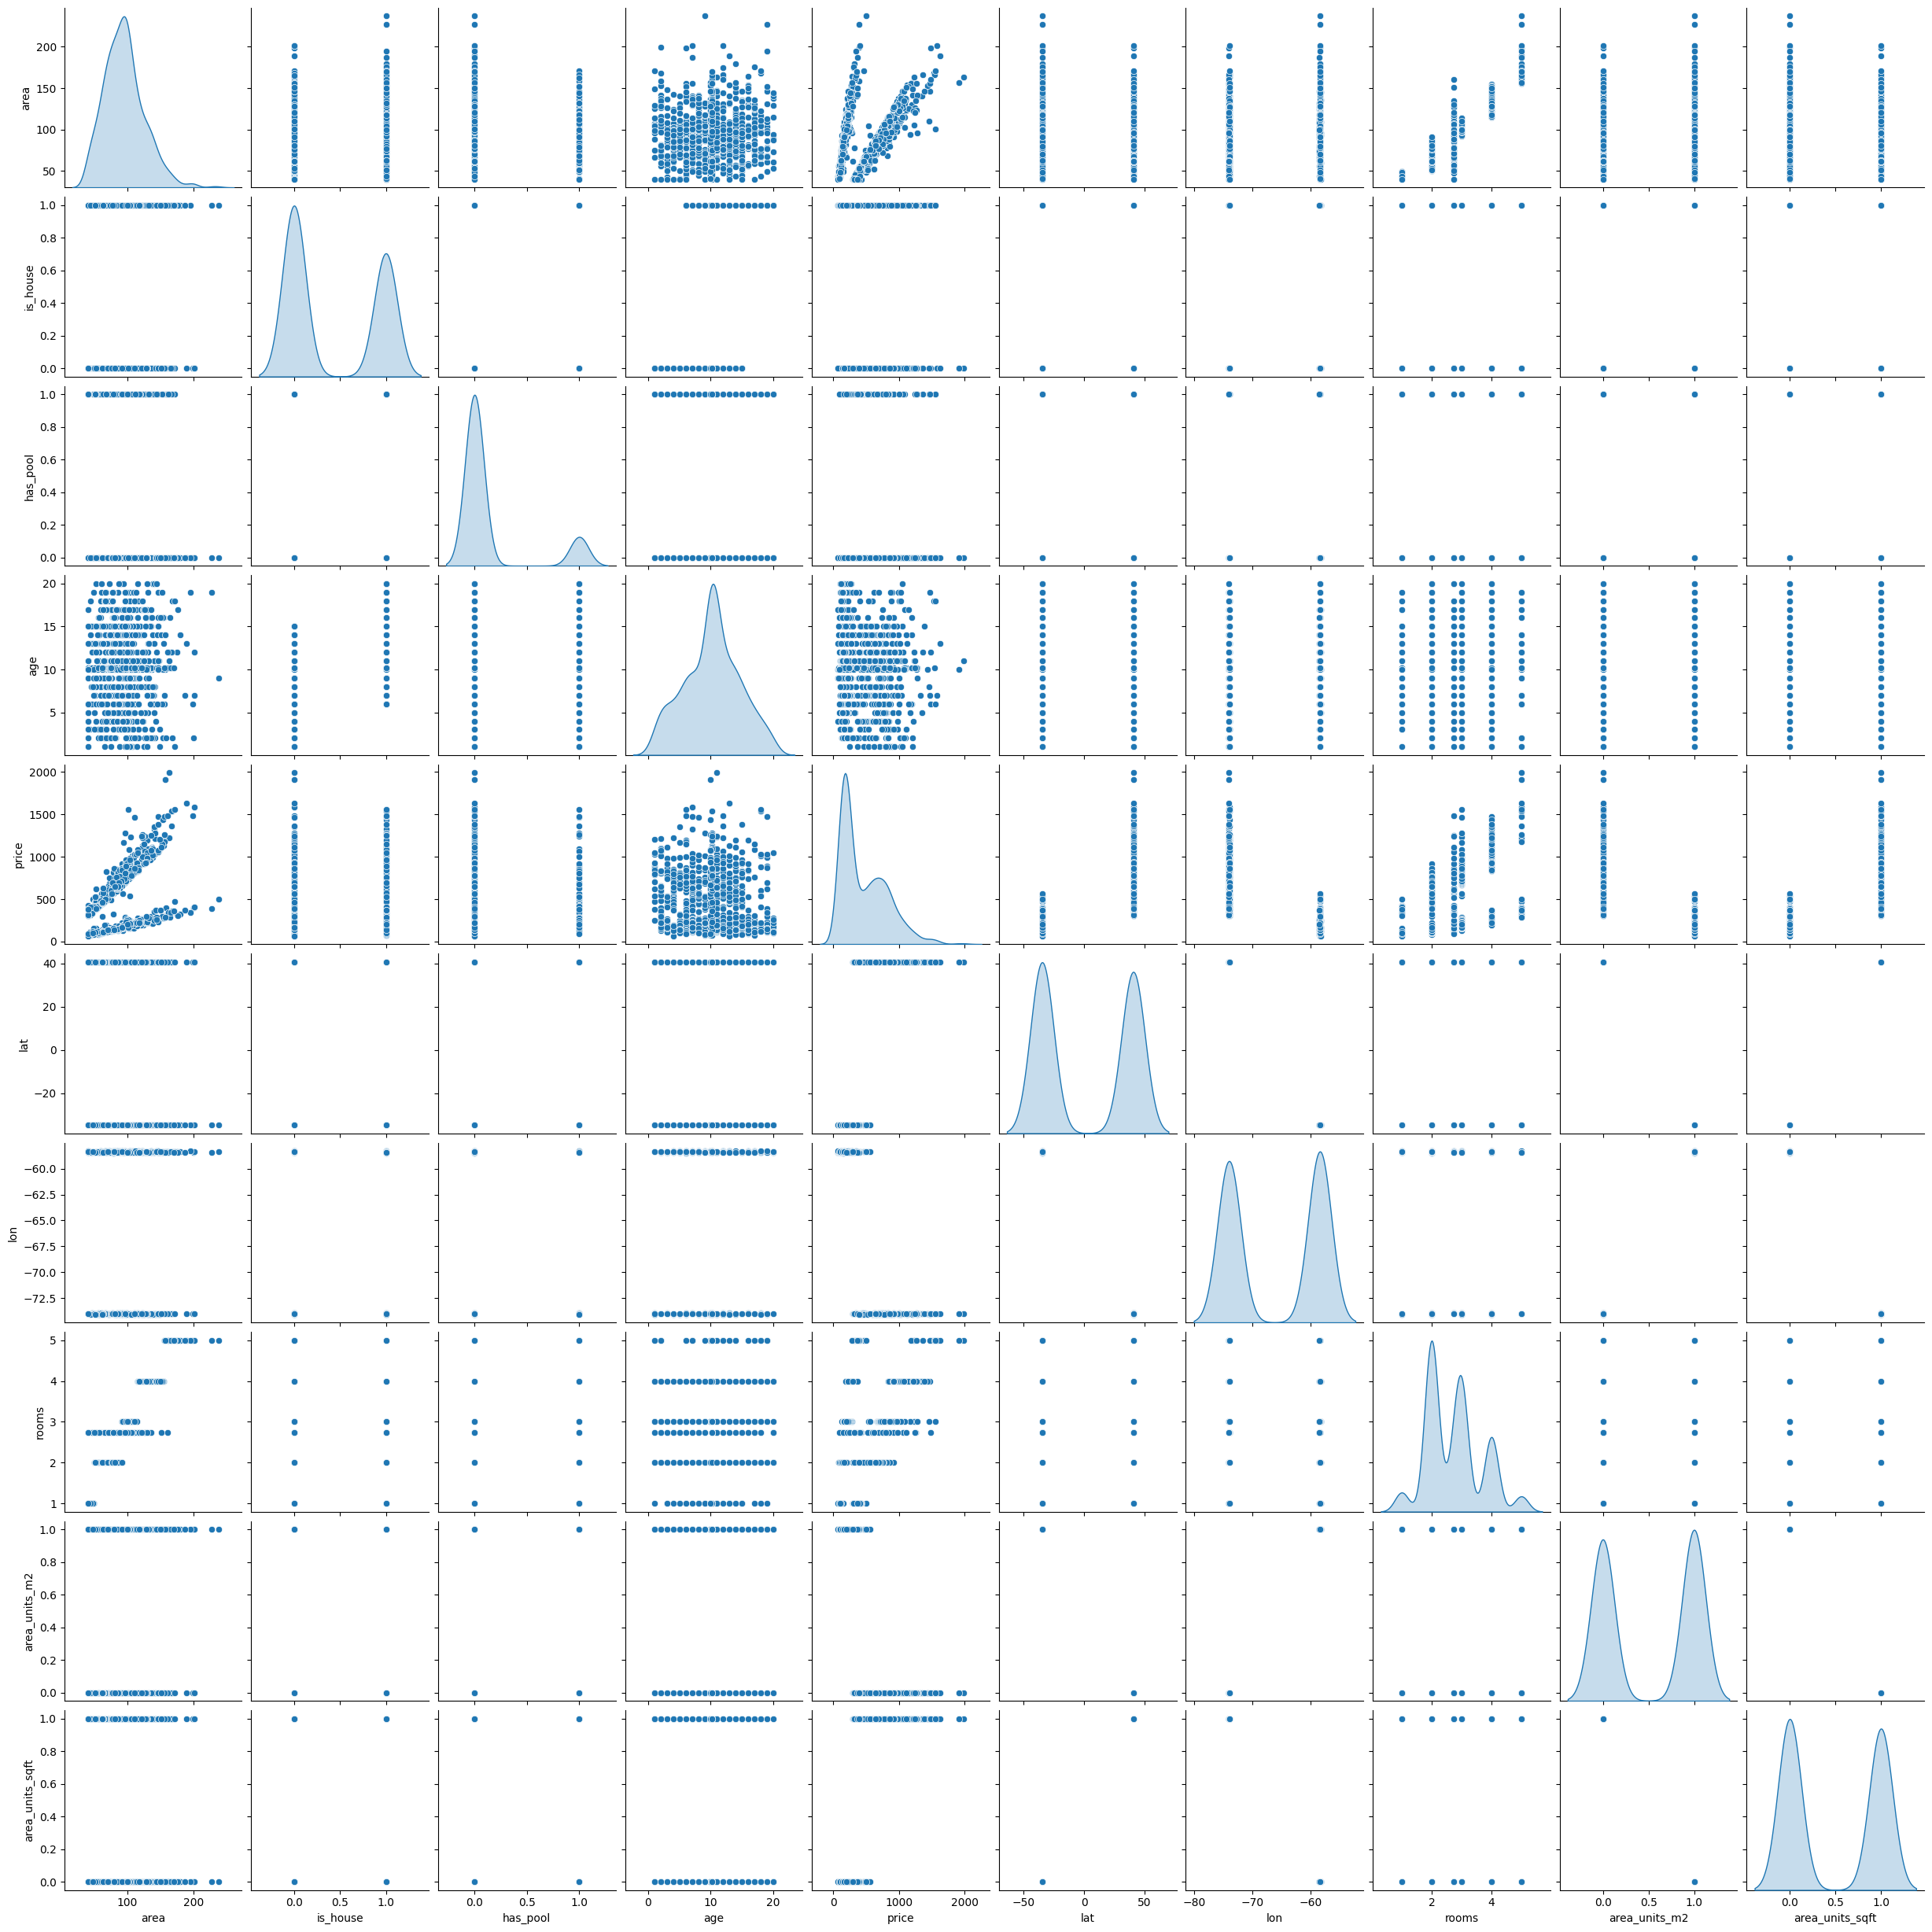

In [114]:
plot_pairplot(df)

1.3

In [115]:
#split the dataset into train and validation
df_train, df_validate = train_validate_split(df, validation_size=0.2, random_state=RANDOM_STATE)

df_train_nomarlized, stats_dict_train = normalize_df(df_train, train=True)

df_validate_nomarlized, _ = normalize_df(df_validate, train=False, stats=stats_dict_train)


2.3

In [116]:
# separate the target variable from the features
target = 'price'
features = df_train_nomarlized.columns.drop(target)

X_train = df_train_nomarlized[features]
y_train = df_train_nomarlized[target]

X_validate = df_validate_nomarlized[features]
y_validate = df_validate_nomarlized[target]

model_pinv = LinearRegression(X_train, y_train)
model_gd = LinearRegression(X_train, y_train)

model_pinv.pinv_fit()
model_pinv.print_model()

model_gd.gradient_descent_fit()
model_gd.print_model()

mse = MSE()
mae = MAE()
r2 = R2()

mse_pinv = model_pinv.loss(X_validate, y_validate, mse)
mae_pinv = model_pinv.loss(X_validate, y_validate, mae)
r2_pinv = model_pinv.loss(X_validate, y_validate, r2)

mse_gd = model_gd.loss(X_validate, y_validate, mse)
mae_gd = model_gd.loss(X_validate, y_validate, mae)
r2_gd = model_gd.loss(X_validate, y_validate, r2)

print("MSE PINV:", mse_pinv)
print("MAE PINV:", mae_pinv)
print("R2 PINV:", r2_pinv)

print("MSE GD:", mse_gd)
print("MAE GD:", mae_gd)
print("R2 GD:", r2_gd)

Trained using pinv method
        Feature  Coefficient
      Intercept   -10.412254
           area     0.476576
       is_house     0.469207
       has_pool     0.106789
            age    -0.028609
            lat     8.421615
            lon     0.711010
          rooms    -0.024792
  area_units_m2    16.245933
area_units_sqft     3.111066 

Trained using gradient_descent method
        Feature  Coefficient
      Intercept    -0.287600
           area     0.418493
       is_house     0.180439
       has_pool     0.024986
            age    -0.017068
            lat     1.120948
            lon     0.089769
          rooms     0.020648
  area_units_m2     0.352990
area_units_sqft     0.056950 

MSE PINV: 0.2574700035611485
MAE PINV: 0.380143642390848
R2 PINV: 0.7234995420443685
MSE GD: 0.1330819139430224
MAE GD: 0.2585476292022007
R2 GD: 0.8570815642913587


3.1

In [ ]:
# do the same with only the area column as a feature

X_train_area = X_train[['area']]
X_validate_area = X_validate[['area']]

model_pinv_area = LinearRegression(X_train_area, y_train)
model_gd_area = LinearRegression(X_train_area, y_train)

model_pinv_area.pinv_fit()
model_pinv_area.print_model()

model_gd_area.gradient_descent_fit()
model_gd_area.print_model()

mse_pinv_area = model_pinv_area.loss(X_validate_area, y_validate, mse)
mae_pinv_area = model_pinv_area.loss(X_validate_area, y_validate, mae)
r2_pinv_area = model_pinv_area.loss(X_validate_area, y_validate, r2)

mse_gd_area = model_gd_area.loss(X_validate_area, y_validate, mse)
mae_gd_area = model_gd_area.loss(X_validate_area, y_validate, mae)
r2_gd_area = model_gd_area.loss(X_validate_area, y_validate, r2)

print("MSE PINV AREA:", mse_pinv_area)
print("MAE PINV AREA:", mae_pinv_area)
print("R2 PINV AREA:", r2_pinv_area)

print("MSE GD AREA:", mse_gd_area)
print("MAE GD AREA:", mae_gd_area)
print("R2 GD AREA:", r2_gd_area)

MSE PINV AREA: 0.8635038491651
MAE PINV AREA: 0.8537598394051402
R2 PINV AREA: 0.07267174257875841
MSE GD AREA: 0.8635095467688899
MAE GD AREA: 0.8537631462937065
R2 GD AREA: 0.07266562384634168
